In [1]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
path1 = "../Data/features_30_sec.csv"
dataset = pd.read_csv(path1)

In [3]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [3]:
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
normalized_features = scaler.fit_transform(features)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Create an SVM classifier object
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_normalized, y_train)

SVC(kernel='linear')

In [9]:
print("SVM Model Properties:")
print("Kernel:", svm_classifier.kernel)
print("C (Regularization parameter):", svm_classifier.C)
# ... and so on, depending on the attributes you want to display

# You can also print the entire model object to see more details
print("\nFull SVC Model Object:")
print(svm_classifier)

SVM Model Properties:
Kernel: linear
C (Regularization parameter): 1.0

Full SVC Model Object:
SVC(kernel='linear')


In [10]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

       blues       0.41      0.65      0.50        20
   classical       1.00      1.00      1.00        13
     country       1.00      0.22      0.36        27
       disco       0.47      0.33      0.39        21
      hiphop       0.48      0.73      0.58        15
        jazz       0.89      0.77      0.83        22
       metal       0.63      0.88      0.73        25
         pop       0.71      0.77      0.74        13
      reggae       0.43      0.70      0.53        23
        rock       0.33      0.10      0.15        21

    accuracy                           0.58       200
   macro avg       0.64      0.62      0.58       200
weighted avg       0.63      0.58      0.56       200



In [11]:
import os
subfolders = os.listdir('../Data/genres_original/')
subfolders

['pop',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 'country',
 'jazz']

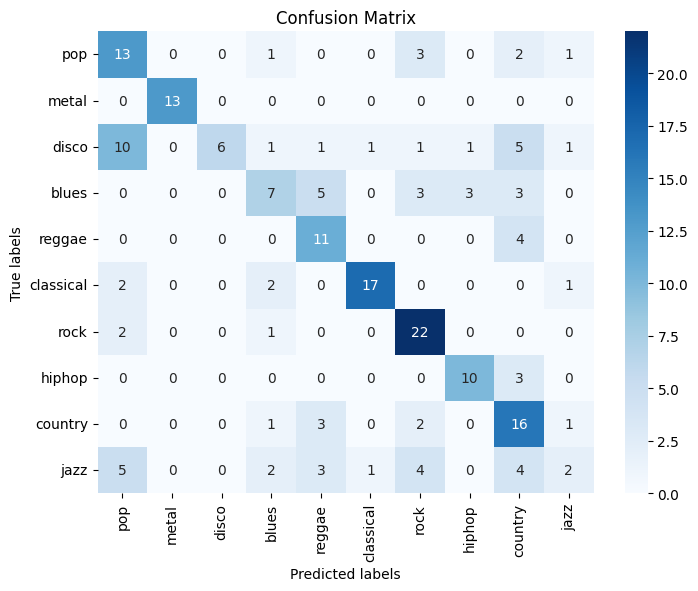

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Create an SVM classifier object
svm_classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_normalized, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Predict the labels for the test data using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.07      1.00      0.12        13
     country       0.00      0.00      0.00        27
       disco       0.00      0.00      0.00        21
      hiphop       0.00      0.00      0.00        15
        jazz       0.00      0.00      0.00        22
       metal       0.00      0.00      0.00        25
         pop       0.00      0.00      0.00        13
      reggae       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        21

    accuracy                           0.07       200
   macro avg       0.01      0.10      0.01       200
weighted avg       0.00      0.07      0.01       200



/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [13]:
#Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Create an SVM classifier object
svm_classifier = SVC(kernel='rbf', gamma=0.1, C=10)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_normalized, y_train)

SVC(C=10, gamma=0.1)

In [14]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

       blues       0.49      0.85      0.62        20
   classical       1.00      0.92      0.96        13
     country       1.00      0.26      0.41        27
       disco       0.50      0.29      0.36        21
      hiphop       0.48      0.73      0.58        15
        jazz       0.85      0.77      0.81        22
       metal       0.67      0.88      0.76        25
         pop       0.83      0.77      0.80        13
      reggae       0.46      0.74      0.57        23
        rock       0.44      0.19      0.27        21

    accuracy                           0.61       200
   macro avg       0.67      0.64      0.61       200
weighted avg       0.67      0.61      0.59       200



In [15]:
import joblib
# Save the trained classifier to a file
joblib.dump(svm_classifier, 'svm_model1.h5')

['svm_model1.h5']